<a href="https://colab.research.google.com/github/Raaj-4320/Airbnb---analysis/blob/main/Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px

In [101]:
df = pd.read_csv("drive/MyDrive/Datasets/Airbnb/abril2019.csv")

<ipython-input-101-e43dc6dfc6dd>:1: DtypeWarning:

Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.



In [102]:
pd.set_option('display.max_columns', 500)

In [103]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190416181629,2019-04-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$302.00,NaN,NaN,$0.00,$306.00,2,$58.00,5,30,5,5,30,30,5.0,30.0,today,t,26,41,67,342,2019-04-16,224,20,2010-07-15,2019-04-05,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.10
1,25026,https://www.airbnb.com/rooms/25026,20190416181629,2019-04-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,88%,NaN,

# Checking null and number of unique values of all features

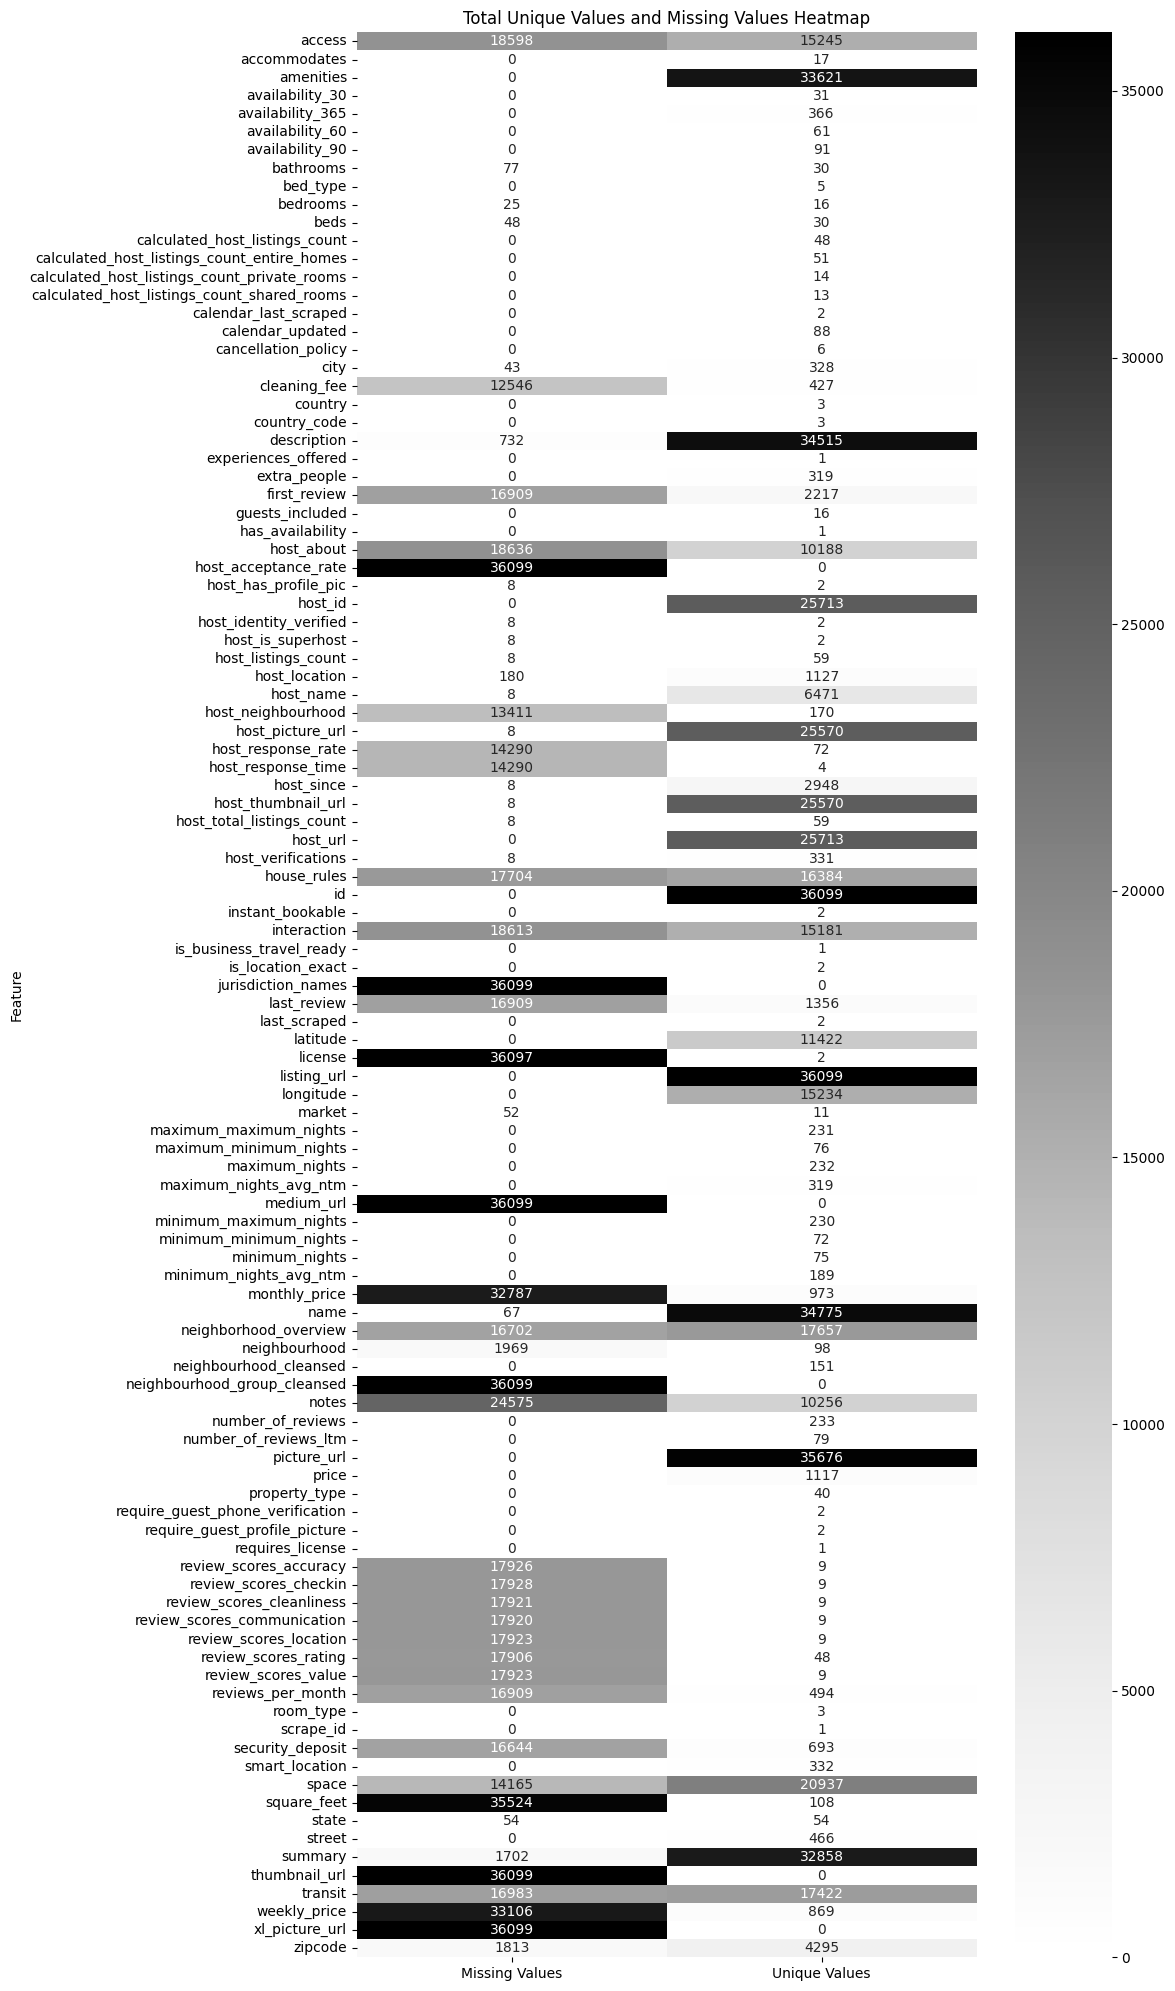

In [104]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Combine the two DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Convert combined DataFrame to wide format for heatmap
heatmap_data = combined_df.pivot_table(index = 'Feature',values=['Unique Values', 'Missing Values'])

# Plotting heatmap
plt.figure(figsize=(10, 25))
sns.heatmap(heatmap_data, annot=True, cmap='Greys', fmt='g')
plt.title('Total Unique Values and Missing Values Heatmap')
plt.show()


In [105]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190416181629,2019-04-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$302.00,NaN,NaN,$0.00,$306.00,2,$58.00,5,30,5,5,30,30,5.0,30.0,today,t,26,41,67,342,2019-04-16,224,20,2010-07-15,2019-04-05,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.10
1,25026,https://www.airbnb.com/rooms/25026,20190416181629,2019-04-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,88%,NaN,

In [106]:
df.columns.unique()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

# Removing features which are not relevant to the analysis and having large number of values is neccessary before proceeding.

In [107]:
import pandas as pd

# Create a list of columns to remove
columns_to_remove = [
    'id',
    'listing_url',
    'scrape_id',
    'last_scraped',
    'name',
    'summary',
    'space',
    'description',
    'experiences_offered',
    'thumbnail_url',
    'medium_url',
    'picture_url',
    'xl_picture_url',
    'host_id',
    'host_url',
    'host_name',
    'host_since',
    'host_location',
    'host_about',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_thumbnail_url',
    'host_picture_url',
    'host_listings_count',
    'host_verifications',
    'host_has_profile_pic',
    'neighbourhood_group_cleansed',
    'country_code',
    'calendar_updated',
    'minimum_nights',
    'maximum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'calendar_last_scraped',
    'first_review',
    'last_review',
    'reviews_per_month',
    'calculated_host_listings_count_shared_rooms',
    'calculated_host_listings_count_private_rooms',
    'jurisdiction_names',
    'license',
    'zipcode',
    'square_feet',
    'neighborhood_overview',
    'state',
    'host_neighbourhood',
    'neighbourhood',
    'neighbourhood_cleansed',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count',
    'require_guest_profile_picture'
]

# Removeing columns from the DataFrame
df = df.drop(columns=columns_to_remove)


# Converting some of the features into integer for data analyzing

In [108]:
# Columns to convert to integer
convert_to_integer = ['beds', 'bedrooms', 'bathrooms', 'accommodates', 'review_scores_value', 'review_scores_location', 'host_total_listings_count', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_rating', 'number_of_reviews_ltm', 'number_of_reviews', 'availability_365', 'availability_90', 'availability_60', 'availability_30', 'minimum_minimum_nights', 'guests_included']

# Fill missing values with 0 and then convert columns to integer
df[convert_to_integer] = df[convert_to_integer].fillna(0).astype(int)

## Removing $ and , from the value and then convert it into integer

`extra_people`
`cleaning_fee`
`security_deposit`
`monthly_price`
`weekly_price`
`price`

In [109]:
# Columns to process
columns_to_process = ['extra_people', 'cleaning_fee', 'security_deposit', 'monthly_price', 'weekly_price', 'price']

# Remove '$' and ',' characters and convert to integer
for col in columns_to_process:
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float).fillna(0).astype(int)


In [110]:
df.head(10)

,notes,transit,access,interaction,house_rules,host_is_superhost,host_total_listings_count,host_identity_verified,street,city,market,smart_location,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_phone_verification
0,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,f,2,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",302,0,0,0,306,2,58,5,t,26,41,67,342,224,20,93,9,10,10,10,10,9,f,t,f,strict_14_with_grace_period,f
1,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,f,3,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.97712,-43.19045,t,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",159,0,0,1000,250,2,45,4,t,4,19,49,287,229,20,94,9,10,9,10,10,9,f,f,f,strict_14_with_grace_period,t
2,NaN,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.","Die Urlauber dürfen das Badezimmer benutzen, d...",NaN,"So far, I haven't had any problems with guests...",t,1,t,"Rio de Janeiro, RJ, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.98302,-43.21427,t,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",252,0,0,0,78,2,39,2,t,12,24,39,128,249,48,96,10,10,10,10,10,10,f,t,f,strict_14_with_grace_period,f
3,Please include the following information with ...,Metro stop just 5 blocks from our place. Buses...,NaN,NaN,"Dear Guest, Welcome! We hope you enjoy our apa...",t,1,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.98816,-43.19359,t,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",350,0,8933,971,159,2,58,2,t,7,19,24,86,147,30,95,10,9,10,10,10,10,f,f,f,strict_14_with_grace_period,t
4,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",t,1,t,"Rio de Janeiro, RJ, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.98127,-43.19046,t,Loft,Entire home/apt,2,1,1,2,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",221,1500,0,400,140,2,80,3,t,10,24,30,154,291,35,98,10,10,10,10,10,10,f,t,f,strict_14_with_grace_period,t
5,NaN,Very close to Siqueira Campos Metro Station,You 'll have an access to 1 or 2 bedrooms 1 pr...,I can easily support my guests with important ...,NaN,f,1,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.96681,-43.18657,t,Apartment,Private room,2,1,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Eleva...",151,600,2000,0,150,1,150,2,t,29,59,89,89,1,0,0,0,0,0,0,0,0,f,f,f,moderate,f
6,The apartment is on the 5th floor. The elevato...,The beach is a few steps away. Bus stop and

In [111]:
# Count total null values column by column
null_values_by_column = df.isnull().sum()

print("Total null values in each column:")
print(null_values_by_column)

Total null values in each column:
notes                               24575
transit                             16983
access                              18598
interaction                         18613
house_rules                         17704
host_is_superhost                       8
host_total_listings_count               0
host_identity_verified                  8
street                                  0
city                                   43
market                                 52
smart_location                          0
country                                 0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                               0
bedrooms                                0
beds                                    0
bed_type                                0


In [21]:
df[df['transit'].isnull() & df['access'].isnull() & df['interaction'].isnull()]

,notes,transit,access,interaction,house_rules,host_is_superhost,host_total_listings_count,host_identity_verified,street,city,market,smart_location,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_phone_verification
16,NaN,NaN,NaN,NaN,NaN,t,3,f,"Rio, Rio de Janeiro, Brazil",Rio,Rio De Janeiro,"Rio, Brazil",Brazil,-22.98282,-43.19571,f,Apartment,Entire home/apt,2,1,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",151,0,3900,0,50,2,0,3,t,6,32,48,269,166,50,98,10,10,10,10,10,10,f,t,f,strict_14_with_grace_period,f
20,NaN,NaN,NaN,NaN,This is a lovely owner-occupied building- plea...,f,1,t,"IPANEMA, Rio de Janeiro, Brazil",IPANEMA,Rio De Janeiro,"IPANEMA, Brazil",Brazil,-22.98467,-43.19753,f,Apartment,Entire home/apt,2,1,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",""Wheelchair access...",264,0,0,1165,175,2,777,4,t,30,60,90,179,13,1,97,9,10,10,10,10,9,f,f,f,strict_14_with_grace_period,f
22,NaN,NaN,NaN,NaN,NaN,f,9,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.98152,-43.19018,t,Apartment,Entire home/apt,4,1,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",109,0,0,0,170,2,50,4,t,17,38,68,152,15,10,88,10,10,10,10,9,9,f,t,f,strict_14_with_grace_period,f
24,In the period of New Year and Carnival the mi...,NaN,NaN,NaN,In the period of New Year the minimum time to...,f,1,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.98119,-43.19373,f,Apartment,Entire home/apt,12,4,4,8,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",396,0,0,2194,395,6,66,2,t,23,50,57,305,112,12,87,9,9,10,10,9,9,f,t,f,strict_14_with_grace_period,f
26,NaN,NaN,NaN,NaN,"No smoking, no drugs",f,1,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.97678,-43.19208,f,Apartment,Private room,2,1,1,1,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,""Family/kid...",202,1400,0,0,150,1,200,2,t,30,60,90,365,5,0,80,8,8,10,9,10,9,f,f,f,moderate,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36084,NaN,NaN,NaN,NaN,NaN,f,1,f,"Santa Cruz, Rio de Janeiro, Brazil",Santa Cruz,Other (International),"Santa Cruz, Brazil",Brazil,-22.92034,-43.67604,t,House,Private room,1,1,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",66,0,0,0,0,1,0,1,t,24,54,84,174,0,0,0,0,0,0,0,0,0,f,t,f,flexible,f
36089,NaN,NaN,NaN,NaN,NaN,f,2,f,"Copacabana, Rio de Janeiro, Brazil",Copacabana,Rio De Janeiro,"Copacabana, Brazil",Brazil,-22.96644,-43.17944,t,Apartment,Private room,3,1,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",221,0,0,0,100,2,70,4,t,6,6,6,6,0,0,0,0,0,0,0,0,0,f,t,f,flexible,f
36091,NaN,NaN,NaN,NaN,1- Os hóspedes devem lavar as louças; 2- Os hó...,f,1,f,"Recreio dos Bandeirantes, Rio Grande do Sul, B...",Recreio dos Bandeirantes,Rio De Janeiro,"Recreio dos Bandeirantes, Brazil",Brazil,-23.00223,-43.43365,t,Apartment,Entire home/apt,6,3,3,5,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,""Free parking...",400,0,0,0,120,1,0,2,t,20,50,80,341,0,0,0,0,0,0,0,0,0,f,t,f,flexible,f
36092,NaN,NaN,NaN,NaN,NaN,f,11,f,"Botafogo, Rio de Janeiro, Brazil",Botafogo,Rio De Janeiro,"Botafogo, Brazil",Brazil,-22.94269,-43.18585,f,Bed and breakfast,P

In [22]:
# Fill null values with empty strings in 'interaction', 'access', and 'transit' columns
df['interaction'] = df['interaction'].fillna('')
df['access'] = df['access'].fillna('')
df['transit'] = df['transit'].fillna('')


In [23]:
# Count total null values column by column
null_values_by_column = df.isnull().sum()

print("Total null values in each column:")
print(null_values_by_column)

Total null values in each column:
notes                               24575
transit                                 0
access                                  0
interaction                             0
house_rules                         17704
host_is_superhost                       8
host_total_listings_count               0
host_identity_verified                  8
street                                  0
city                                   43
market                                 52
smart_location                          0
country                                 0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                               0
bedrooms                                0
beds                                    0
bed_type                                0


# Visualization

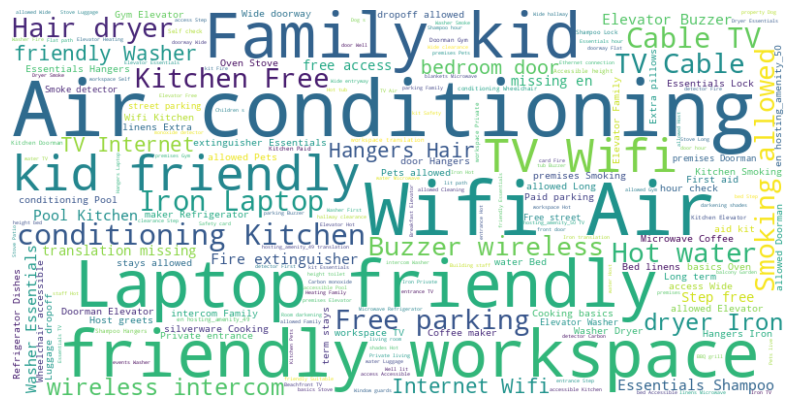

In [31]:
# Concatenate all amenities into a single string
all_amenities = ', '.join(df['amenities'])

# Remove curly braces and double quotes, and split into individual amenities
amenities_list = all_amenities.replace('{', '').replace('}', '').replace('"', '').split(',')

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(amenities_list))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# As we can see from the above wordcloud, that Aur conditioninig, Laptop or workspace friendly space, kids and family friendly and wifi are the services mostly provided by the airbnb owners.

In [96]:
# Filter out rows with missing latitude and longitude values
df_filtered = df.dropna(subset=['latitude', 'longitude'])

# Create a scatter map using Plotly Express
fig = px.scatter_mapbox(df_filtered,
                        lat='latitude',
                        lon='longitude',
                        hover_name='room_type',
                        color='room_type',
                        zoom=10)

# Update layout to use OpenStreetMap
fig.update_layout(mapbox_style="open-street-map")

# Show the interactive map
fig.show()


# Mostly the option of shared room in available in copcabana and santa teresa areas,in other areas shared room are not a populor option. Therefore people who are searching for shared room, can easily find one in copcabana area compared to other areas.

In [47]:
df.head(5)

,notes,transit,access,interaction,house_rules,host_is_superhost,host_total_listings_count,host_identity_verified,street,city,market,smart_location,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_phone_verification
0,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,f,2,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",302,0,0,0,306,2,58,5,t,26,41,67,342,224,20,93,9,10,10,10,10,9,f,t,f,strict_14_with_grace_period,f
1,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,f,3,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.97712,-43.19045,t,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",159,0,0,1000,250,2,45,4,t,4,19,49,287,229,20,94,9,10,9,10,10,9,f,f,f,strict_14_with_grace_period,t
2,NaN,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.","Die Urlauber dürfen das Badezimmer benutzen, d...",,"So far, I haven't had any problems with guests...",t,1,t,"Rio de Janeiro, RJ, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.98302,-43.21427,t,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",252,0,0,0,78,2,39,2,t,12,24,39,128,249,48,96,10,10,10,10,10,10,f,t,f,strict_14_with_grace_period,f
3,Please include the following information with ...,Metro stop just 5 blocks from our place. Buses...,,,"Dear Guest, Welcome! We hope you enjoy our apa...",t,1,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.98816,-43.19359,t,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",350,0,8933,971,159,2,58,2,t,7,19,24,86,147,30,95,10,9,10,10,10,10,f,f,f,strict_14_with_grace_period,t
4,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",t,1,t,"Rio de Janeiro, RJ, Brazil",Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",Brazil,-22.98127,-43.19046,t,Loft,Entire home/apt,2,1,1,2,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",221,1500,0,400,140,2,80,3,t,10,24,30,154,291,35,98,10,10,10,10,10,10,f,t,f,strict_14_with_grace_period,t


In [86]:
# Assuming you have the property types stored in a Series named 'property_type'
property_types = df['property_type']

# Count the occurrences of each property type
property_type_counts = property_types.value_counts()

# Sort the property types by count in descending order
property_type_counts_sorted = property_type_counts.sort_values(ascending=False)

# Create a bar plot of the top 10 property types by count
fig = px.bar(property_type_counts_sorted.head(10), x=property_type_counts_sorted.head(10).index, y=property_type_counts_sorted.head(10),
             labels={'x': 'Property Type', 'y': 'Count'}, title='Top 10 Property Types by Count',color='count', text_auto='.2s')

# Show the plot
fig.show()

# Apartments are mostly used as airbnb property and Guesthouse,GuestSuits, Hostels are the least popular options for stay

In [97]:
# Assuming you have the property types stored in a Series named 'property_type'
property_types = df['room_type']

# Count the occurrences of each property type
property_type_counts = property_types.value_counts()

# Sort the property types by count in descending order
property_type_counts_sorted = property_type_counts.sort_values(ascending=False)

# Create a bar plot of the top 10 property types by count
fig = px.bar(property_type_counts_sorted.head(10), x=property_type_counts_sorted.head(10).index, y=property_type_counts_sorted.head(10),
             labels={'x': 'Room Type', 'y': 'Count'}, title='Room Types by Count',color='count', text_auto='.2s')

# Show the plot
fig.show()

# Among the total Rooom Type offered renting option "Entire home/apt" is most popular and shared room is the least.

# Plotting correlation of numerical features

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36099 entries, 0 to 36098
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   notes                             11524 non-null  object 
 1   transit                           19116 non-null  object 
 2   access                            17501 non-null  object 
 3   interaction                       17486 non-null  object 
 4   house_rules                       18395 non-null  object 
 5   host_is_superhost                 36091 non-null  object 
 6   host_total_listings_count         36099 non-null  int64  
 7   host_identity_verified            36091 non-null  object 
 8   street                            36099 non-null  object 
 9   city                              36056 non-null  object 
 10  market                            36047 non-null  object 
 11  smart_location                    36099 non-null  object 
 12  coun